In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ConsLaborPortfolioModel import LaborPortfolioConsumerType, init_labor_portfolio
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType
from HARK.utilities import plot_funcs

In [2]:
agent = LaborPortfolioConsumerType()
agent.cycles = 10

In [3]:
def plot_3d_func(func, lims_x, lims_y, n=100, label_x="x", label_y="y", label_z="z"):
    # get_ipython().run_line_magic("matplotlib", "widget")
    xmin, xmax = lims_x
    ymin, ymax = lims_y
    xgrid = np.linspace(xmin, xmax, n)
    ygrid = np.linspace(ymin, ymax, n)

    xMat, yMat = np.meshgrid(xgrid, ygrid, indexing="ij")

    zMat = func(xMat, yMat)

    ax = plt.axes(projection="3d")
    ax.plot_surface(xMat, yMat, zMat, cmap="viridis")
    ax.set_title("surface")
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.set_zlabel(label_z)
    plt.show()

In [4]:
agent.solve()

In [5]:
share_func = agent.solution[0].portfolio_stage.share_func
c_func = agent.solution[0].consumption_stage.c_func
labor_func = agent.solution[0].labor_stage.labor_func
leisure_func = agent.solution[0].labor_stage.leisure_func

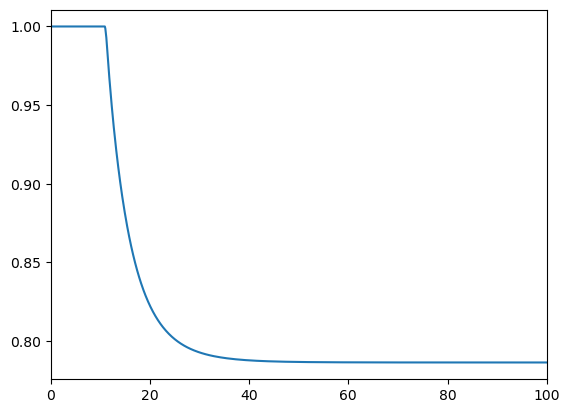

In [6]:
plot_funcs(share_func, 0, 100)

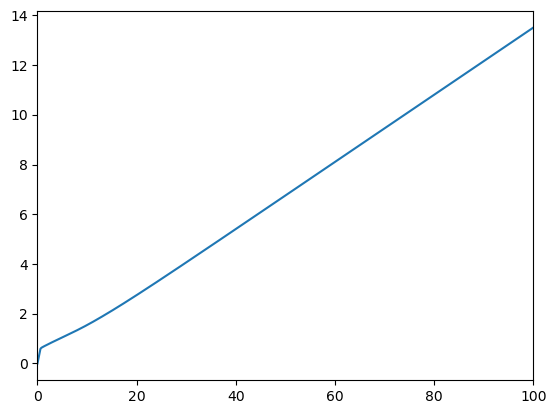

In [7]:
plot_funcs(c_func, 0, 100)

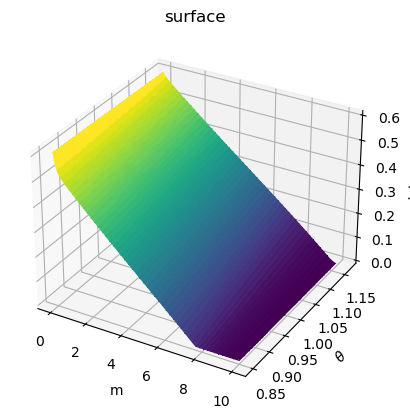

In [13]:
plot_3d_func(
    labor_func,
    (0, 10),
    [min(agent.TranShkGrid), max(agent.TranShkGrid)],
    label_x="m",
    label_y=r"$\theta$",
    label_z="labor",
)

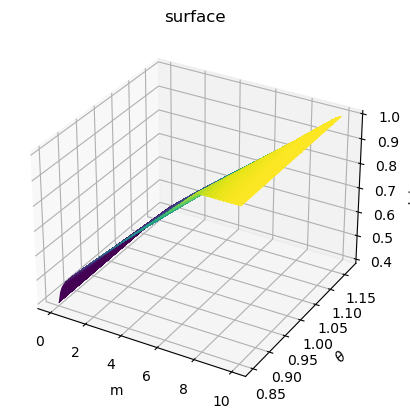

In [14]:
plot_3d_func(
    leisure_func,
    (0, 10),
    [min(agent.TranShkGrid), max(agent.TranShkGrid)],
    label_x="m",
    label_y=r"$\theta$",
    label_z="leisure",
)

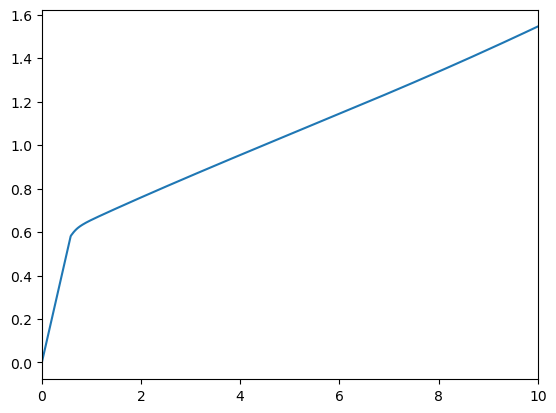

In [10]:
plot_funcs(agent.solution[0].consumption_stage.c_func, 0, 10)